In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('cvp_fuel_consumption.xlsx')

In [3]:
df

,Reg No.,Vin No.,Start Odometer (kms),End Odometer (kms),KMs Driven,Fuel Efficiency,Fuel Consumed
0,PB10HV9284,MAT796001N1F17194,44435,44513,77.9,1.9 Km/L,73
1,PB10HV3356,MAT796001N1E15276,48916.8,48919,2.2,0.4 Km/L,NaN
2,PB10HQ8952,MAT796001M1H16517,70804.6,75918,5113.4,2.5 Km/L,611.5
3,PB10HQ3227,MAT796001M1F12550,25825,26677.3,852.3,3.1 Km/L,277
4,CG10BG5425,MAT828018M3N25064,76524 Kms,81550 Kms,5026.1,2.9 Km/L,1737.2 L
...,...,...,...,...,...,...,...
1456,PB10HS5449,MAT796001M1N25185,52225 Kms,55041 Kms,2816.2,2.3 Km/L,1200 L
1457,PB10HS5450,MAT796001M1N25071,45645 Kms,48014 Kms,2460.4,2.5 Km/L,950.5 L
1458,PB10HT4632,MAT796001N5A01069,49776 Kms,53222 Kms,3591.3,2.6 Km/L,1399 L
1459,PB10HT4630,MAT796001N5A01068,51310 Kms,55420 Kms,4210.3,2.9 Km/L,1481 L


In [4]:
df.shape

(1461, 7)

In [5]:
df.isnull().sum()

Reg No.                 93
Vin No.                  0
Start Odometer (kms)     0
End Odometer (kms)       0
KMs Driven               0
Fuel Efficiency          0
Fuel Consumed            1
dtype: int64

In [6]:
df['Start Odometer (kms)'] = df['Start Odometer (kms)'].str.replace(' Kms', '', regex=False)
df['End Odometer (kms)'] = df['End Odometer (kms)'].str.replace(' Kms', '', regex=False)
df['Fuel Consumed'] = df['Fuel Consumed'].str.replace(' L', '', regex=False)

In [7]:
df.head()

,Reg No.,Vin No.,Start Odometer (kms),End Odometer (kms),KMs Driven,Fuel Efficiency,Fuel Consumed
0,PB10HV9284,MAT796001N1F17194,NaN,NaN,77.9,1.9 Km/L,NaN
1,PB10HV3356,MAT796001N1E15276,NaN,NaN,2.2,0.4 Km/L,NaN
2,PB10HQ8952,MAT796001M1H16517,NaN,NaN,5113.4,2.5 Km/L,NaN
3,PB10HQ3227,MAT796001M1F12550,NaN,NaN,852.3,3.1 Km/L,NaN
4,CG10BG5425,MAT828018M3N25064,76524,81550,5026.1,2.9 Km/L,1737.2


In [8]:
df.isnull().sum()

Reg No.                 93
Vin No.                  0
Start Odometer (kms)     4
End Odometer (kms)       4
KMs Driven               0
Fuel Efficiency          0
Fuel Consumed            4
dtype: int64

In [9]:
df.nunique()

Reg No.                 515
Vin No.                 546
Start Odometer (kms)    972
End Odometer (kms)      974
KMs Driven              971
Fuel Efficiency         121
Fuel Consumed           917
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reg No.               1368 non-null   object 
 1   Vin No.               1461 non-null   object 
 2   Start Odometer (kms)  1457 non-null   object 
 3   End Odometer (kms)    1457 non-null   object 
 4   KMs Driven            1461 non-null   float64
 5   Fuel Efficiency       1461 non-null   object 
 6   Fuel Consumed         1457 non-null   object 
dtypes: float64(1), object(6)
memory usage: 80.0+ KB


In [11]:
df.columns

Index(['Reg No.', 'Vin No.', 'Start Odometer (kms)', 'End Odometer (kms)',
       'KMs Driven', 'Fuel Efficiency', 'Fuel Consumed'],
      dtype='object')

In [12]:
for column in df.columns:
    print("=================================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

Reg No. ==> Missing zeros : 0
Vin No. ==> Missing zeros : 0
Start Odometer (kms) ==> Missing zeros : 0
End Odometer (kms) ==> Missing zeros : 0
KMs Driven ==> Missing zeros : 442
Fuel Efficiency ==> Missing zeros : 0
Fuel Consumed ==> Missing zeros : 0


In [13]:
df.dropna(axis=0, inplace = True)

In [14]:
df.isnull().sum()/df.isnull().count()*100

Reg No.                 0.0
Vin No.                 0.0
Start Odometer (kms)    0.0
End Odometer (kms)      0.0
KMs Driven              0.0
Fuel Efficiency         0.0
Fuel Consumed           0.0
dtype: float64

In [15]:
df.describe()

,KMs Driven
count,1364.000000
mean,2417.294428
std,5266.451411
min,0.000000
25%,0.000000
50%,1802.900000
75%,3976.700000
max,152516.800000


In [16]:
df.drop(['Reg No.', 'Vin No.'], axis=1, inplace=True)

In [17]:
df.replace('0', pd.NA, inplace=True)

In [18]:
df.dropna(axis=0, inplace = True)

In [19]:
df.replace('-', pd.NA, inplace=True)

In [20]:
df.dropna(axis=0, inplace = True)

In [21]:
df.isnull().sum()/df.isnull().count()*100

Start Odometer (kms)    0.0
End Odometer (kms)      0.0
KMs Driven              0.0
Fuel Efficiency         0.0
Fuel Consumed           0.0
dtype: float64

In [22]:
# df['Start Odometer (kms)'].unique()
# df['End Odometer (kms)'].unique()
df['Fuel Efficiency'].unique()
# df['Fuel Consumed'].unique()

array(['2.9 Km/L', '2.2 Km/L', '0 Km/L', '2.3 Km/L', '3.1 Km/L',
       '2.4 Km/L', '1.8 Km/L', '0.1 Km/L', '0.2 Km/L', '2.7 Km/L',
       '2.1 Km/L', '0.8 Km/L', '0.9 Km/L', '2.5 Km/L', '0.3 Km/L',
       '2 Km/L', '3.3 Km/L', '1.7 Km/L', '1.3 Km/L', '3 Km/L', '2.6 Km/L',
       '3.2 Km/L', '769.4 Km/L', '1 Km/L', '7.4 Km/L', '2.8 Km/L',
       '3.6 Km/L', '1.9 Km/L', '3.4 Km/L', '1.6 Km/L', '1.1 Km/L',
       '1.4 Km/L', '0.7 Km/L', '0.5 Km/L', '1.5 Km/L', '4.2 Km/L',
       '149.4 Km/L', '251.53L/H', '227.08L/H', '250.14L/H', '240L/H',
       '277.12L/H', '276.69L/H', '266.61L/H', '260.77L/H', '263.42L/H',
       '255.8L/H', '301.09L/H', '264.67L/H', '246.76L/H', '259.74L/H',
       '280L/H', '251.11L/H', '254.55L/H', '203.89L/H', '4 Km/L',
       '5.1 Km/L', '3.8 Km/L', '4.3 Km/L', '244.8L/H', '245L/H',
       '275.74L/H', '248.99L/H', '237.6L/H', '261.31L/H', '258.48L/H',
       '249.62L/H', '237.07L/H', '1.03L/H', '243.73L/H', '231.7L/H',
       '262.56L/H', '236.67L/H', '243.25L

In [23]:
df['Fuel Efficiency'] = df['Fuel Efficiency'].str.replace('L/H', ' L/H', regex=False)

In [24]:
df.shape

(967, 5)

In [25]:
df.reset_index(drop=True, inplace=True)
df

,Start Odometer (kms),End Odometer (kms),KMs Driven,Fuel Efficiency,Fuel Consumed
0,76524,81550,5026.1,2.9 Km/L,1737.2
1,70862,72098,1236.0,2.2 Km/L,563.7
2,56907,56907,0.0,0 Km/L,88
3,51345,51503,157.5,2.3 Km/L,68.5
4,61650,63101,1450.9,2.2 Km/L,687
...,...,...,...,...,...
962,52225,55041,2816.2,2.3 Km/L,1200
963,45645,48014,2460.4,2.5 Km/L,950.5
964,49776,53222,3591.3,2.6 Km/L,1399
965,51310,55420,4210.3,2.9 Km/L,1481


In [26]:
df['Start Odometer (kms)'] = df['Start Odometer (kms)'].astype(float)
df['End Odometer (kms)'] = df['End Odometer (kms)'].astype(float)
df['Fuel Consumed'] = df['Fuel Consumed'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Start Odometer (kms)  967 non-null    float64
 1   End Odometer (kms)    967 non-null    float64
 2   KMs Driven            967 non-null    float64
 3   Fuel Efficiency       967 non-null    object 
 4   Fuel Consumed         967 non-null    float64
dtypes: float64(4), object(1)
memory usage: 37.9+ KB


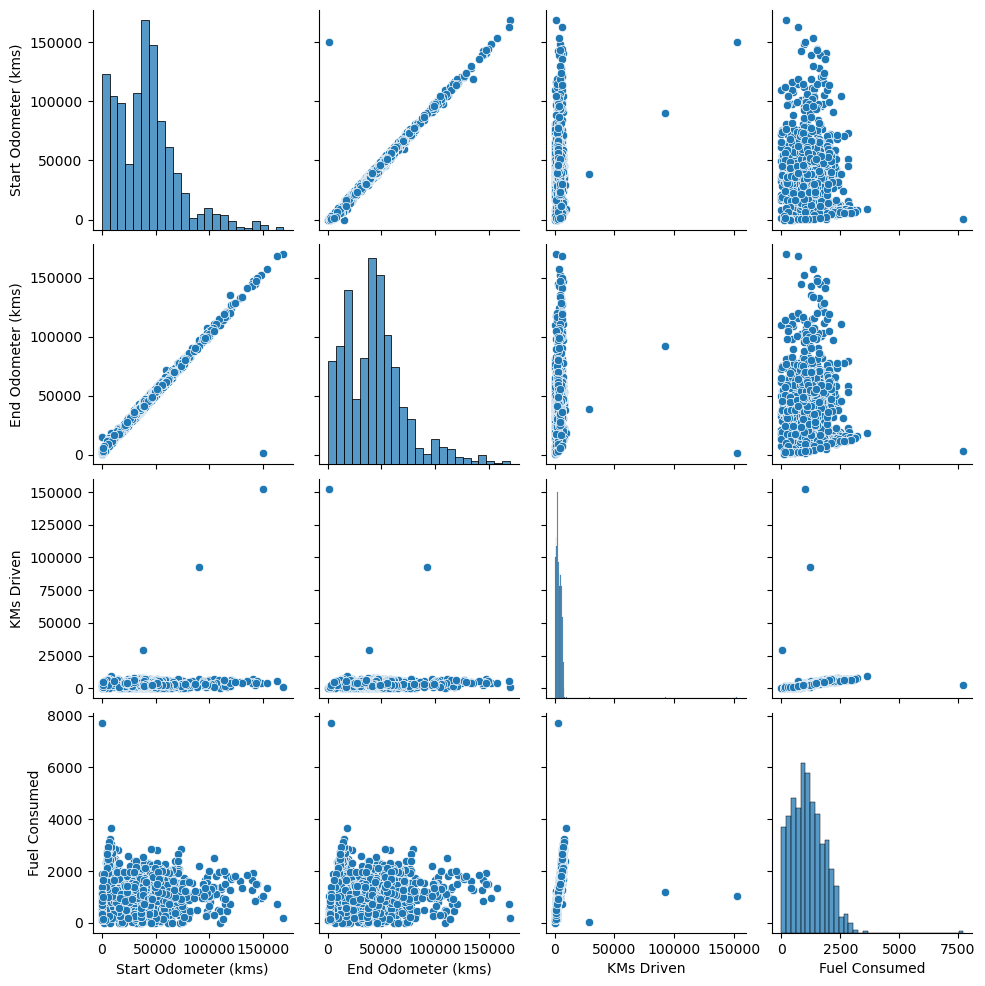

In [27]:
sns.pairplot(df)

In [28]:
df.corr()

/var/folders/rv/d70fd8zd4tsd0ss73nzlsry40000gn/T/ipykernel_901/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Start Odometer (kms),End Odometer (kms),KMs Driven,Fuel Consumed
Start Odometer (kms),1.000000,0.982995,0.131211,-0.081511
End Odometer (kms),0.982995,1.000000,0.015212,-0.020782
KMs Driven,0.131211,0.015212,1.000000,0.286490
Fuel Consumed,-0.081511,-0.020782,0.286490,1.000000


/var/folders/rv/d70fd8zd4tsd0ss73nzlsry40000gn/T/ipykernel_901/1168407472.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


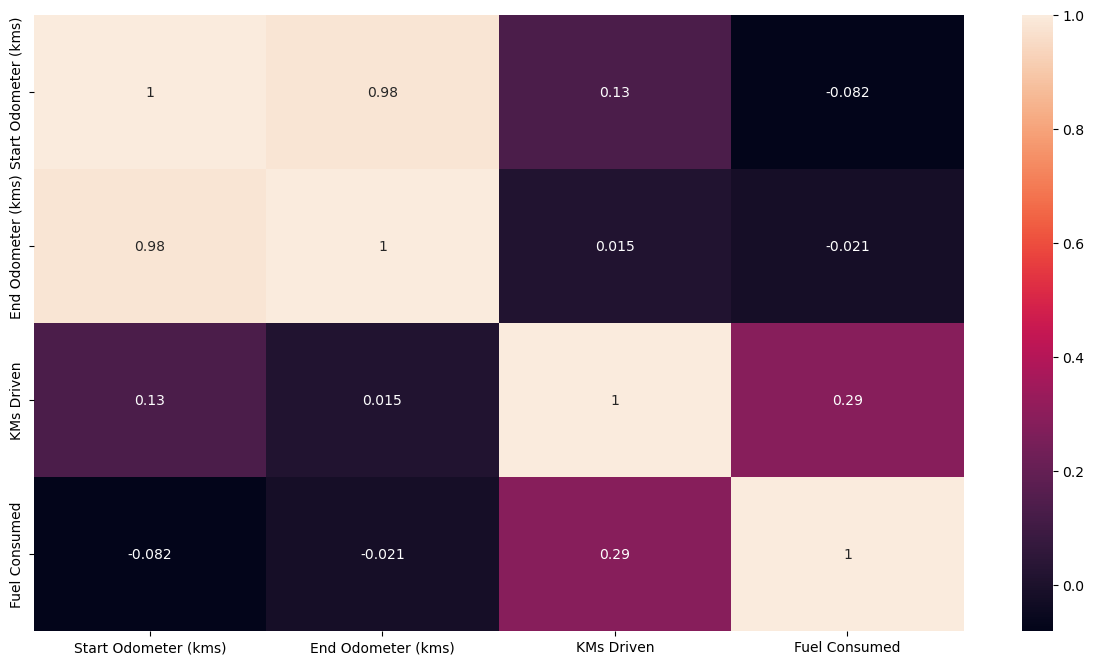

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

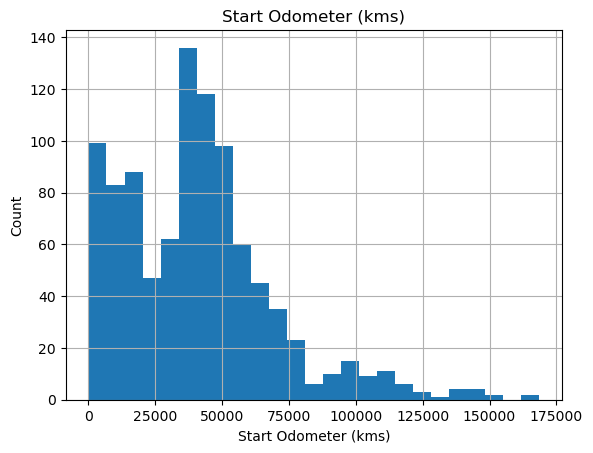

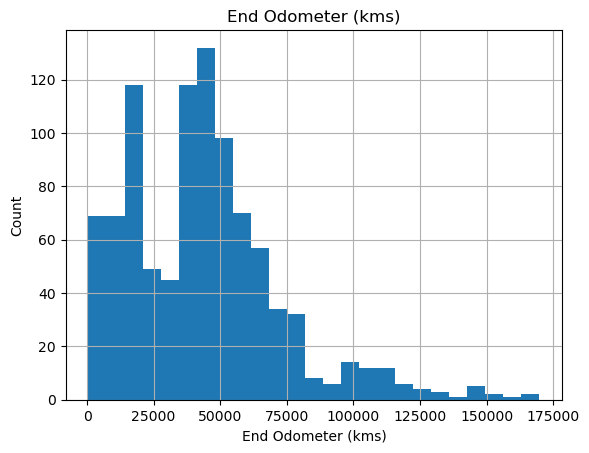

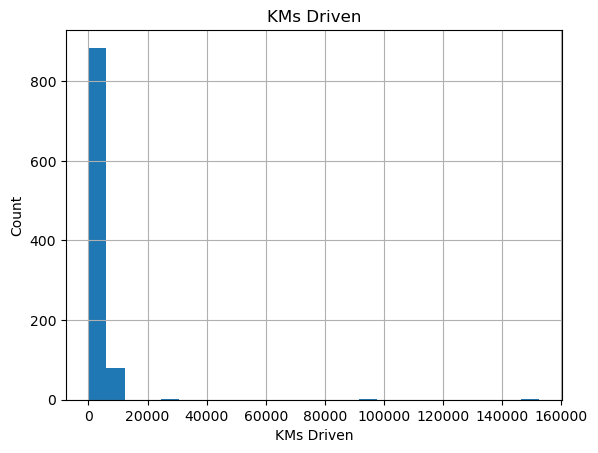

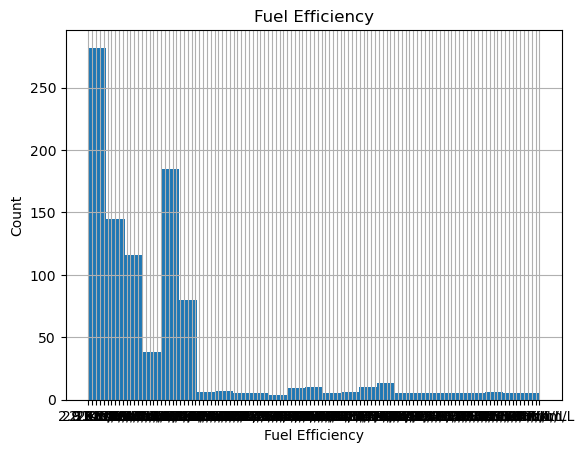

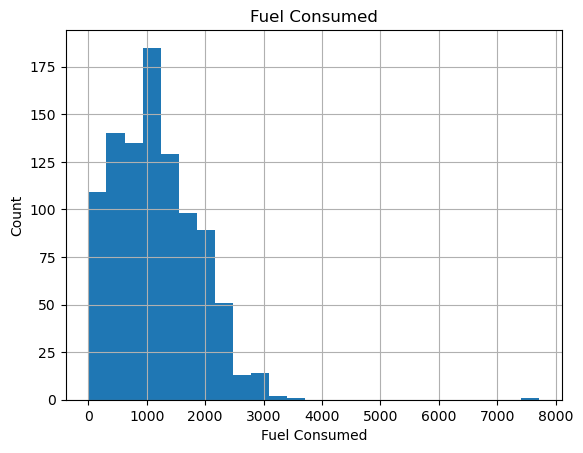

In [30]:
for column in df.columns:
    df[column].hist(bins=25)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(column)
    plt.show()

In [31]:
features = ['Start Odometer (kms)', 'End Odometer (kms)', 'KMs Driven', 'Fuel Consumed']

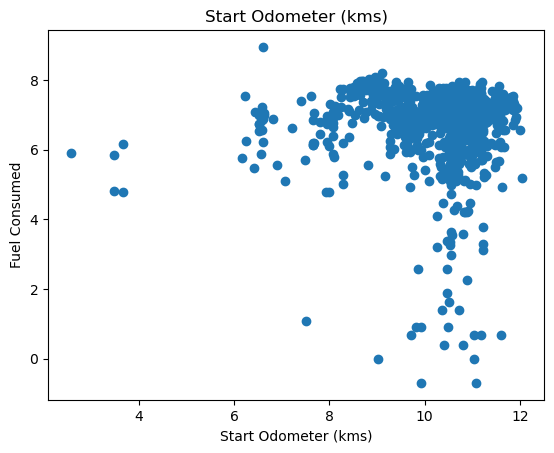

/Users/applre/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/applre/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


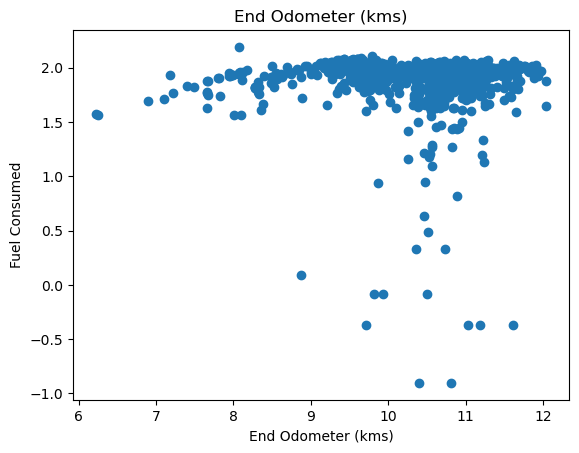

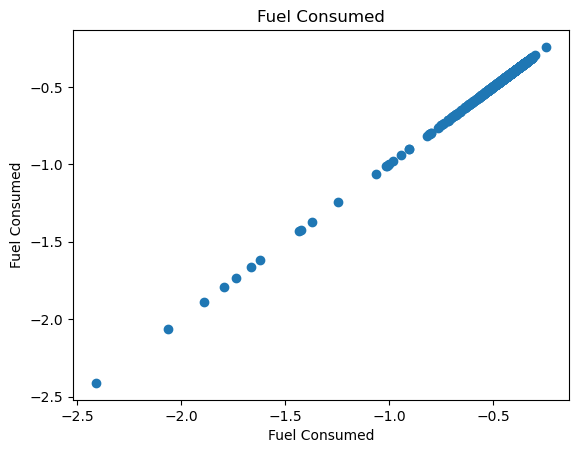

In [32]:
for feature in features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df['Fuel Consumed']=np.log(df['Fuel Consumed'])
        plt.scatter(df[feature], df['Fuel Consumed'])
#         df[column].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Fuel Consumed')
        plt.title(feature)
        plt.show()

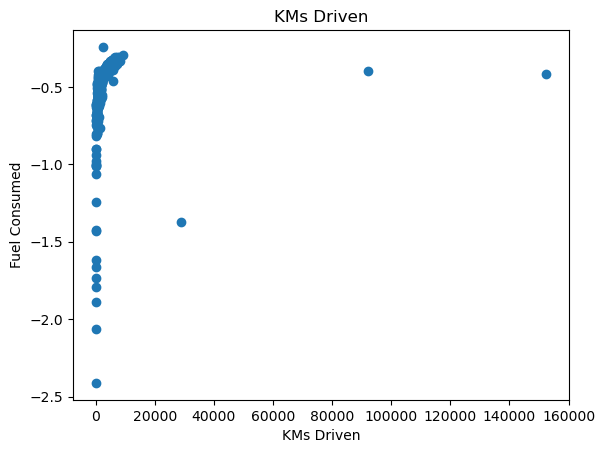

In [33]:
plt.scatter(df['KMs Driven'], df['Fuel Consumed'])
# df['Fuel Consumed'].hist(bins=25)
plt.xlabel('KMs Driven')
plt.ylabel('Fuel Consumed')
plt.title('KMs Driven')
plt.show()

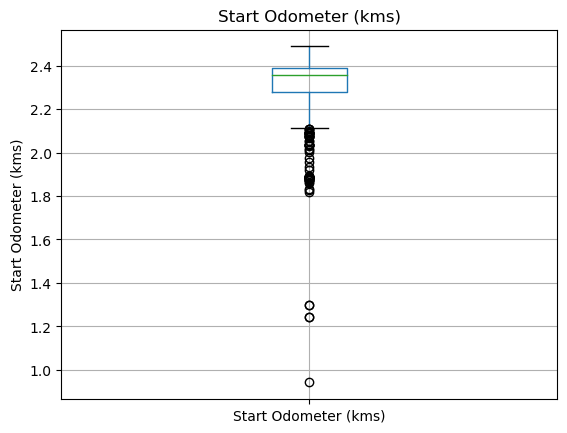

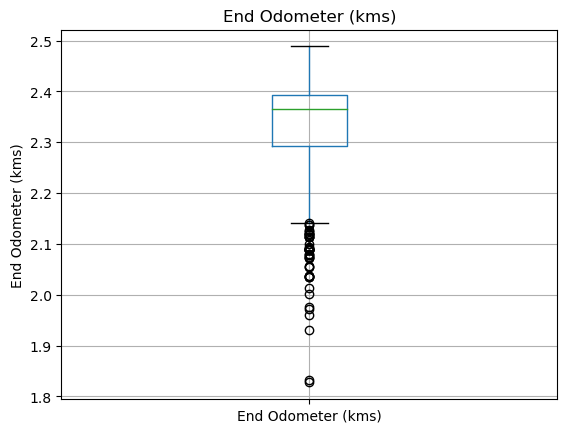

/Users/applre/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


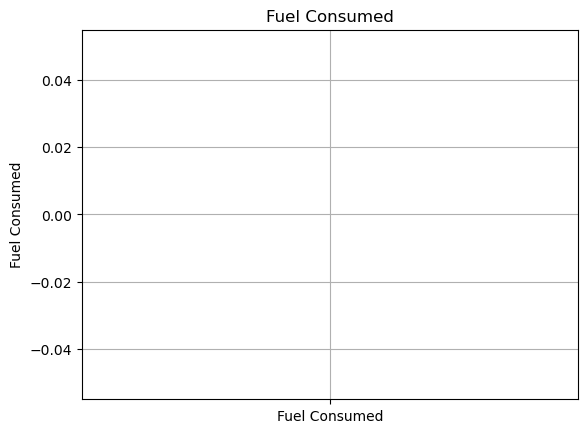

In [34]:
for feature in features:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()